#***New statistical models for long-range forecasting of southwest monsoon rainfall over India***
M. Rajeevan, D. S. Pai, R. Anil Kumar, B. Lal

##***Ensemble Linear Regressor Models for Weather Forecasting***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Linear Regression class 
class LinearRegression() :
    def __init__( self, learning_rate, iterations ) :
        self.lr = learning_rate
        self.iterations = iterations

    # this class function fits the model parameters by calling the iterate method
    def fit( self, X, Y ) :
        # no_of_training_examples, no_of_features
        self.row_dim, self.feature_dim = X.shape
        # weight initialization
        self.W = np.zeros(self.feature_dim)
        self.b = 0
        self.X = X
        self.Y = Y
          
        # gradient descent learning  
        for i in range( self.iterations ) :
            self.iterate()
        return self
      
    #iterate function runs the one iteration of the batch gradient descent
    #we have used Batch Gradient Descent(BGD) here as training data is not very large, which may not cause system overloading
    def iterate(self) :    
        Y_pred = self.predict(self.X) 
        # calculate gradients 
        dW = - (2*(self.X.T).dot(self.Y - Y_pred))/self.row_dim
        db = - 2*np.sum(self.Y - Y_pred)/self.row_dim
        # update weights
        self.W = self.W - self.lr * dW
        self.b = self.b - self.lr * db
        return self
      
    # Hypothetical function  h( x ) 
    def predict(self, X) :
        return X.dot(self.W) + self.b
     
  
#src-gfg

In [ ]:
# we don't have data right now, hence, I will be writing the code so that feeding a csv datafile will work 
df=pd.read_csv('path1....')
df_test=pd.read_csv('path2....')
column_names=list(df.columns)


#the following code snippet reads the values of the rainfall in respective units for the years ynder consideration
df_rain=pd.read_csv('path3....')
df_rain_test=pd.read_csv('path4....')


#we can use train_test_split in case we do not have different dataset for training and testing


\begin{align}
    GCV = \frac{\sum{({Y'-Y})^2}/n}{(1-\frac{p}{n})^2}
\end{align}
<br><br>
Here $Y'$ is predicted rainfall value, and $Y$ is the actual rainfall in that year. <br>
$p$ is the number of features used for the model, and $n$ is the number of training points.

In [10]:
gcv=[]
# Generalised Cross Validation list contains the gcv scores for each of the model, which are adjusted for the number of parameters that they use,
# similar to various information criteria like AIC (Akaike Information Score) or Heidke Skill Score (HSS)


In [ ]:
#now, assuming that we have 6 features as in the original paper, we will have 63 combination of features(and hence linear regressors) to choose from
# the binary representation of any number gives us a unique combination of features - "001011" means that the 3rd, 5th and 6th features are taken into account

for i in range(1, pow(2,len(column_names))):   # going from 1 to 63

    str_bin=str(bin(i))
    temp_column_names_list=[] 
    #holds the names of columns for this particular iteration


    str_bin=str_bin[2:]  #removing the 0b from the front of "0b001011"
    for i in range(len(str_bin)):
        if str_bin[i]=="1":
            temp_column_names_list.append(column_names[i]) 

    # selecting only the columns required for this iteration, selection of columns given by the binary representation of the iteration number
    df_this_iteration=df[df.columns[df.columns.isin(temp_column_names_list)]]

    # initialising and training the regressor
    lrg=LinearRegression(0.001, 100)
    lrg.fit(df_this_iteration.values, df_rain.values)

    # making predictions and finding the GCV score described above
    predictions=np.array(lrg.predict(df_this_iteration.values))
    p=len(temp_column_names_list)
    n=df_this_iteration.shape[0]                 #number of training examples  

    gcv=np.sum(np.square(predictions-np.array(df_rain)))/(n*np.square(1-p/n))

    gcv.append()
    # appending the gcv score to the list 



      

In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving Choosing best model.png to Choosing best model.png


In [ ]:
model_ordered_by_rank=[]
for i in range(len(gcv)):
    model_ordered_by_rank.append([i+1, gcv[i]])
model_ordered_by_rank = model_ordered_by_rank.sorted(key= lamda element: element[1])

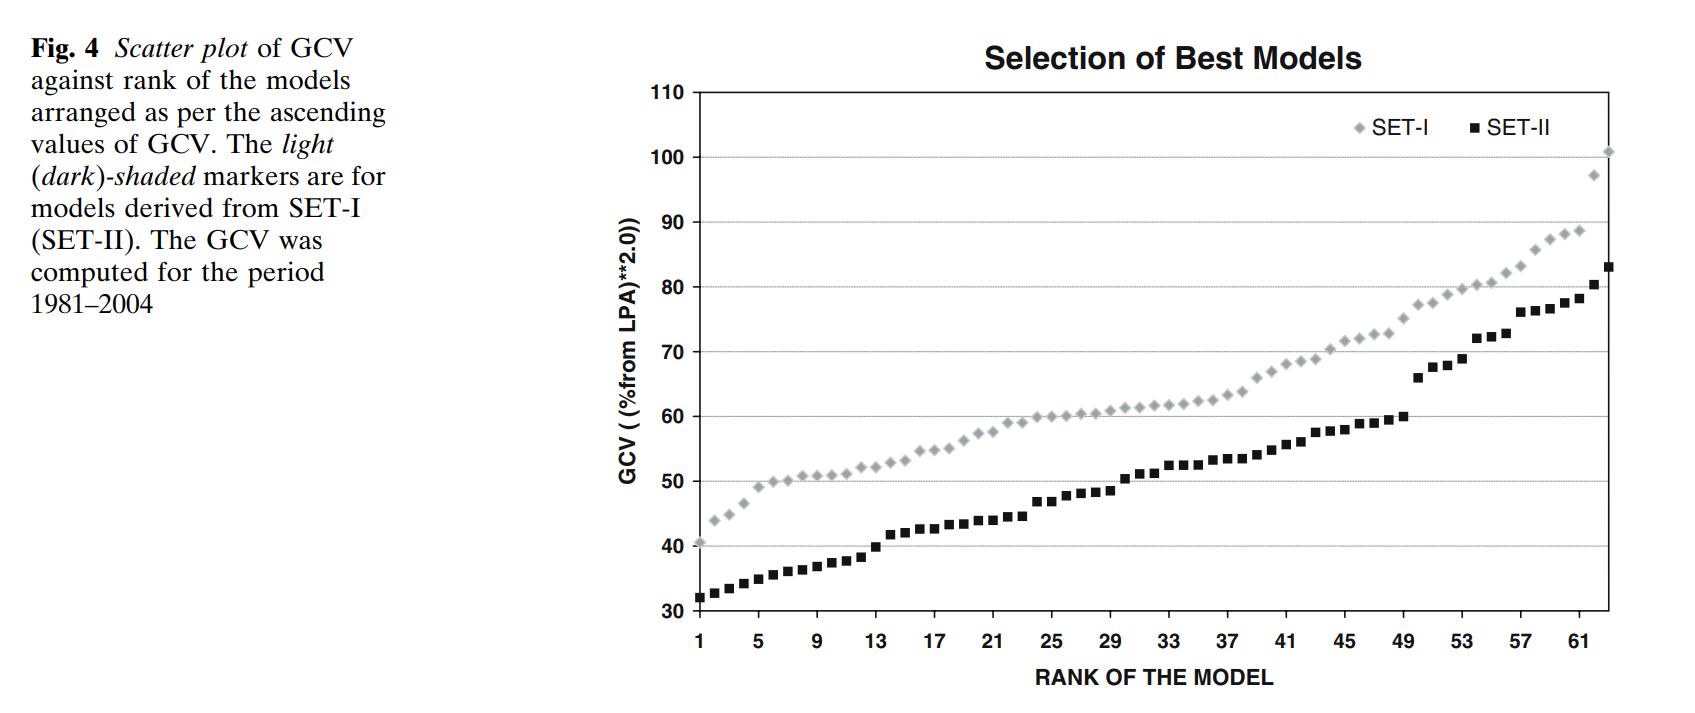

In [6]:
Image('Choosing best model.png', width=1000)
# a similar graph will be obtained when we plot the gcv from the sorted 2d list above

In the above graph, we see that there is a jump in the GCV at n=4 for SET1 model, and n=13 for SET2 model. Hence we choose 4 best linear regressors for SET1 ensemble, and 13 best for SET2 ensemble.
<br><br><br>

The ensemble average is given by - <br>
\begin{align}
    Y'_E = \frac{\sum^{i=k}_{i=1}{w_i Y'_i}}{\sum^{i=k}_{i=1}{w_i}}
\end{align}<br><br>
Where $w_i$ is the weight of the individual regressor in any ensemble, and $Y'_i$ is the prediction of the individual regressor. 

<br><br><br>
### $w_i$ can be the inverse of RMSE score of the regressor - This weighs the regressor by how well it performs on the train set<br>
### $w_i$ can be set to 1 - simple averaging of the ensemble of regressors
We can also use any other weighing paradigm
<br><br><br>

In [7]:
uploaded = files.upload()

Saving ensemble rmse.png to ensemble rmse.png


###***We can also plot the RMSE loss graphs to get an idea about the best ensemble model***

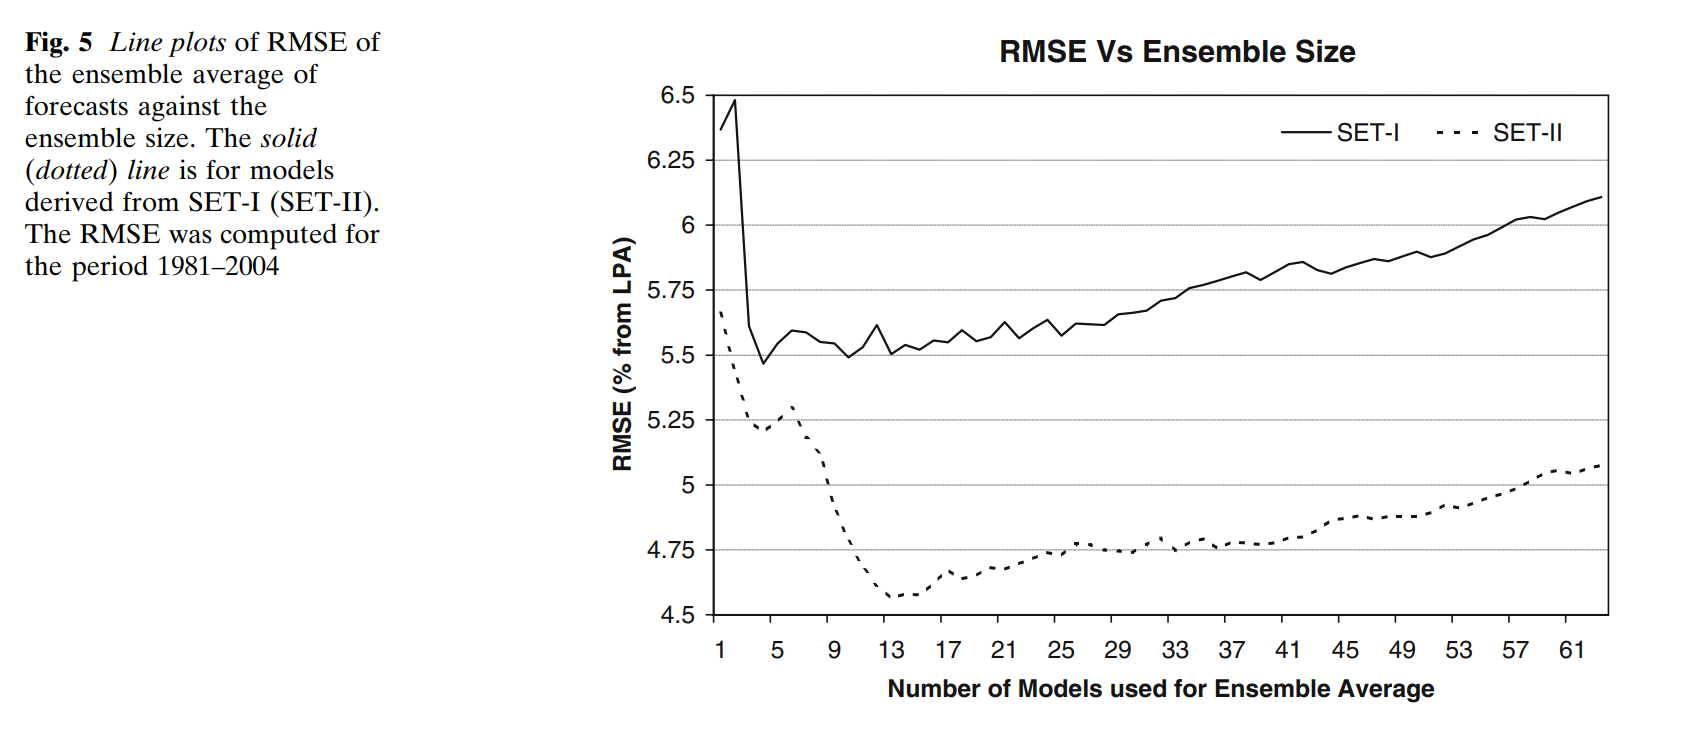

In [9]:
Image('ensemble rmse.png', width=1000)
# rmse of cumulative ensemble of best k individual linear regressors
# this has not been implemented in this script 

In [11]:
uploaded = files.upload()

Saving choosing best window length.png to choosing best window length.png


###***Optimal Training lenght (sliding window method)***

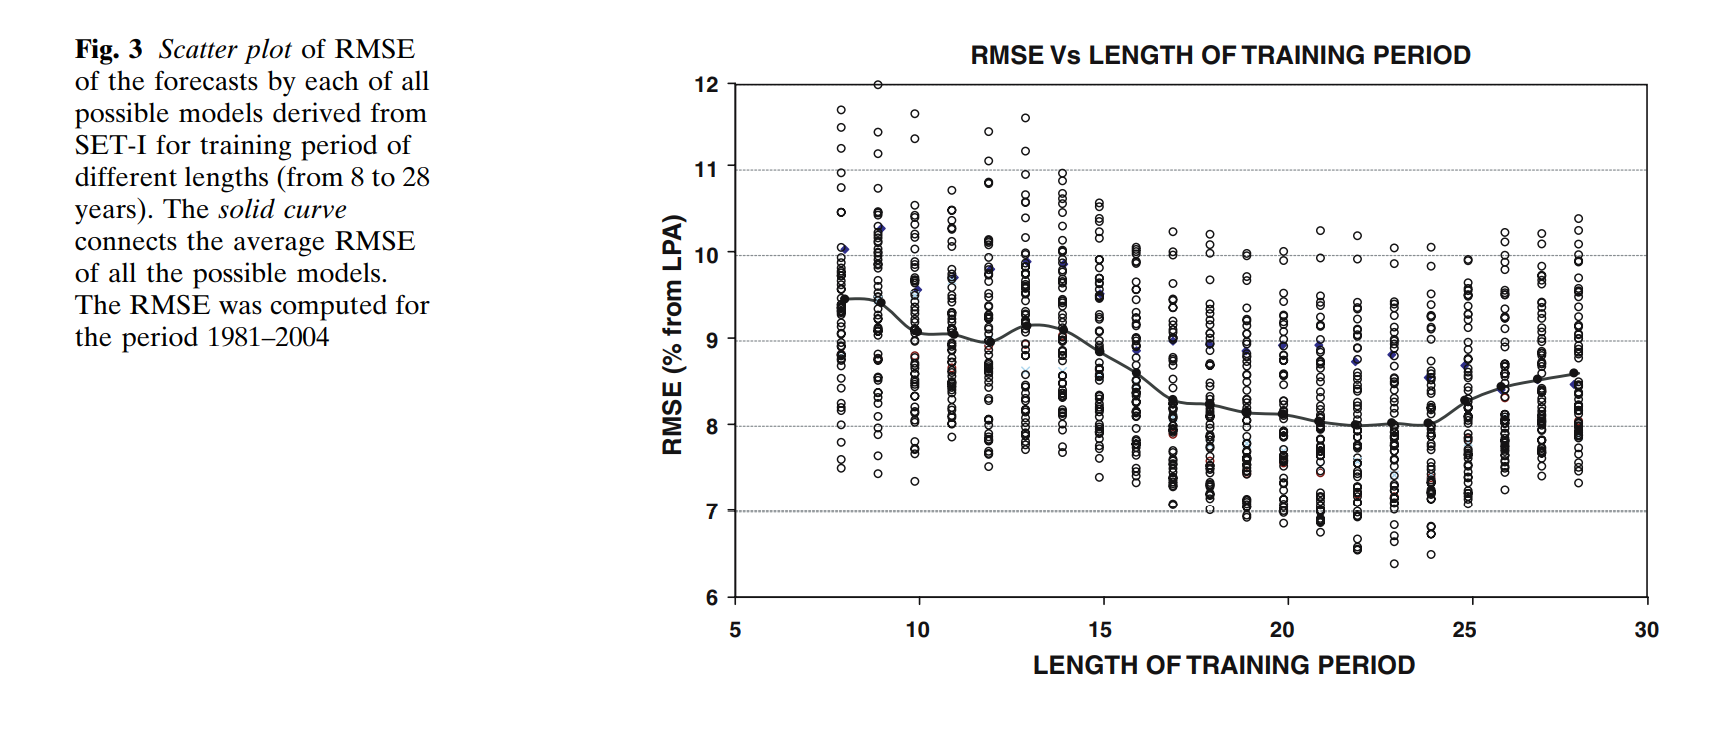

In [14]:
Image('choosing best window length.png', width=1000)
# Experimenting with the training length period of various models is shown below
# it was experimentally found in the original paper that 23 years of training data yielded best results averaged over 63 different regressors
# this has not been implemented in this script 